#Importing Dependencies

In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


#Datacollection & Analysis

In [6]:
df=pd.read_csv("/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Project/diabetes.csv")

In [7]:
df.shape 
#print the no.of rows and columns

(768, 9)

In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df.head() 
#printing first five data from the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.info() 
#Gives the basic information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()
#Print the Statistical measures of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()
#Print the Null values if any present in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


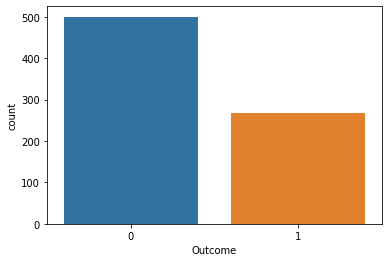

In [16]:
sb.countplot(x='Outcome',data=df)
plt.show()

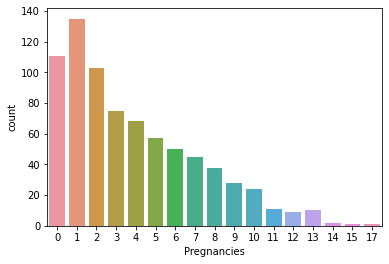

In [17]:
sb.countplot(x='Pregnancies',data=df)
plt.show()

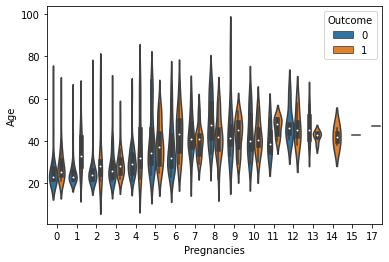

In [18]:
 sb.violinplot(x="Pregnancies",y="Age",hue="Outcome",data=df)
plt.show()

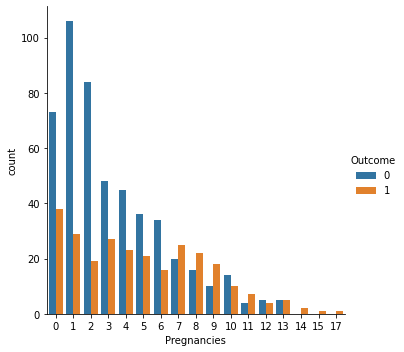

In [19]:
sb.catplot(x="Pregnancies",hue="Outcome",kind="count",data=df)
plt.show()

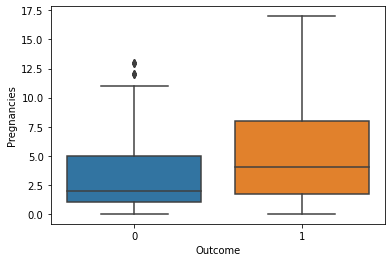

In [20]:
sb.boxplot(x="Outcome",y="Pregnancies",data=df)
plt.show()

In [21]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


##Separating the Data and Labels

In [22]:
x=df.drop(columns="Outcome",axis=1)

In [23]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [24]:
y=df["Outcome"]

In [25]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#Data Standardization 
 
#Train_Test_Split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [27]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (691, 8) (77, 8)


In [28]:
sc=StandardScaler()

In [29]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [30]:
x_train

array([[ 0.64073703,  1.06850378,  0.24780543, ..., -0.3557498 ,
         1.13806722,  0.47594352],
       [ 0.04843029, -1.20025169,  0.87103945, ..., -0.3557498 ,
        -0.45291915,  0.05473838],
       [-0.84002981, -0.75289146,  0.04006075, ...,  0.76504362,
        -0.75465795, -0.28222573],
       ...,
       [ 0.04843029, -0.84875436, -0.2196201 , ..., -0.94161909,
        -0.96800861, -1.04039498],
       [ 2.12150386, -1.13634308,  0.24780543, ..., -0.25385949,
        -0.50473289,  0.13897941],
       [ 0.34458366,  0.49332633,  0.66329478, ..., -4.08748243,
         0.53154176,  3.00317435]])

In [31]:
x_test

array([[-8.90267381e-01,  2.01919271e+00,  3.98232563e-01,
         1.50781181e+00, -6.77151530e-01,  1.46436736e+00,
         2.45930357e+00, -9.69409076e-01],
       [-5.85598099e-01, -4.53829621e-01,  2.98674422e-01,
         6.71623654e-01,  3.44613467e-01,  3.11262602e-01,
        -3.52730856e-01, -8.74922368e-01],
       [ 2.37404635e-02, -1.28713063e+00, -2.98674422e-01,
        -1.25804132e+00, -6.77151530e-01,  3.60858505e-01,
        -3.89656561e-01, -6.85948954e-01],
       [ 3.28409745e-01,  1.13213036e+00,  1.99116281e-01,
        -3.59201705e-02,  1.11093721e+00, -6.55857515e-01,
         1.67069446e-01,  1.77070544e+00],
       [-1.19493666e+00, -3.46306911e-01, -1.49337211e-01,
        -1.25804132e+00, -6.77151530e-01, -8.04645225e-01,
         3.74421480e-01, -1.19028709e-01],
       [-8.90267381e-01, -1.15272724e+00,  1.99116281e-01,
        -1.00242336e-01, -2.68445531e-01, -5.56665708e-01,
        -6.96423952e-01, -7.80435661e-01],
       [ 1.54708687e+00,  7.558008

#Model Evaluation
 
#Accurancy Score

In [46]:
clf= SVC(kernel = 'linear',random_state=0)

In [47]:
clf.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [50]:
pred_x =clf.predict(x_train)
#Predicting the outcome for trained data

In [51]:
pred_x

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,

In [52]:
y_train

499    0
720    0
556    0
583    0
150    0
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 691, dtype: int64

In [53]:
pred_x-y_train
#comparing predicted and actual train data

499    1
720    0
556    0
583    0
150    0
      ..
763    0
192    0
629    0
559    0
684    0
Name: Outcome, Length: 691, dtype: int64

In [55]:
print("Accuracy score of the training data:",accuracy_score(pred_x,y_train))
#Accuracy score for train data

Accuracy score of the training data: 0.7756874095513748


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
pred_y= clf.predict(x_test)
#Predicting the outcome for test data

In [ ]:
pred_y

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [41]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
253    0
622    0
235    1
351    0
672    0
Name: Outcome, Length: 77, dtype: int64

In [42]:
pred_y-y_test
#Comparing Predicted and Actual test data

661    0
122    0
113    0
14     0
529    0
      ..
253    0
622    1
235    0
351    0
672    0
Name: Outcome, Length: 77, dtype: int64

In [49]:
print("Accuracy score of the test data",accuracy_score(y_test,pred_y))
#Accurancy score for test data

Accuracy score of the test data 0.8571428571428571


In [44]:
confusion_matrix(y_train,pred_x)

array([[415,  34],
       [ 88, 154]])

In [45]:
confusion_matrix(y_test, pred_y)

array([[47,  4],
       [ 9, 17]])

#Making a Predictive System

In [ ]:
Input_data=(1,85,66,29,0,33.6,0.627,20)
 
 
# changing the input_data to numpy array
Input_data_as_array = np.asarray(Input_data)
 
# reshape the array as we are predicting for one instance
Input_data_reshaped = Input_data_as_array.reshape(1,-1)
 
# standardize the input data
Std_data = sc.transform(Input_data_reshaped)
print(Std_data)
 
Prediction = Classifier.predict(Std_data)
print(Prediction)
 
if (Prediction[0] == 0):
  print('The person is not Diabetic')
else:
  print('The person is Diabetic')

[[-0.89026738 -1.04520453 -0.09955814  0.60730149 -0.67715153  0.3112626
   0.280687   -1.15838249]]
[0]
The person is not Diabetic
